# Cone search demo

This notebook walks through performing a cone search of the pixels in a HiPSCat catalog. This shows strategies for visualizing a catalog's partitions, and using hipscat's spatial metadata to improve performance in targeted queries.

In [23]:
import numpy as np
from hipscat.catalog import Catalog
from hipscat import inspection
import healpy as hp

## Fill in these variables with what's relevant in your use case:

### Change this path!!!
catalog_path = "../../tests/data/small_sky_order1"

ra = 0  # degrees
dec = -80  # degrees
radius = 10  # degrees

In [24]:
## Load catalog

catalog = Catalog.read_from_hipscat(catalog_path)

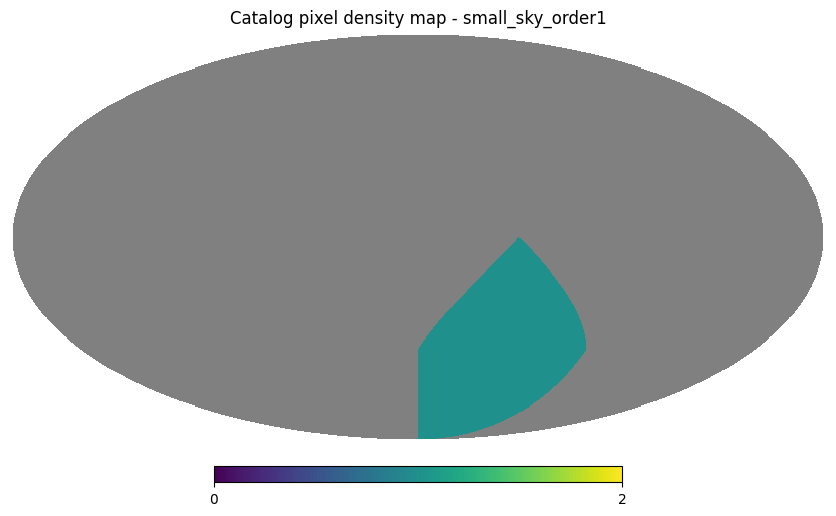

In [25]:
## Plot catalog pixels

inspection.plot_pixels(catalog)

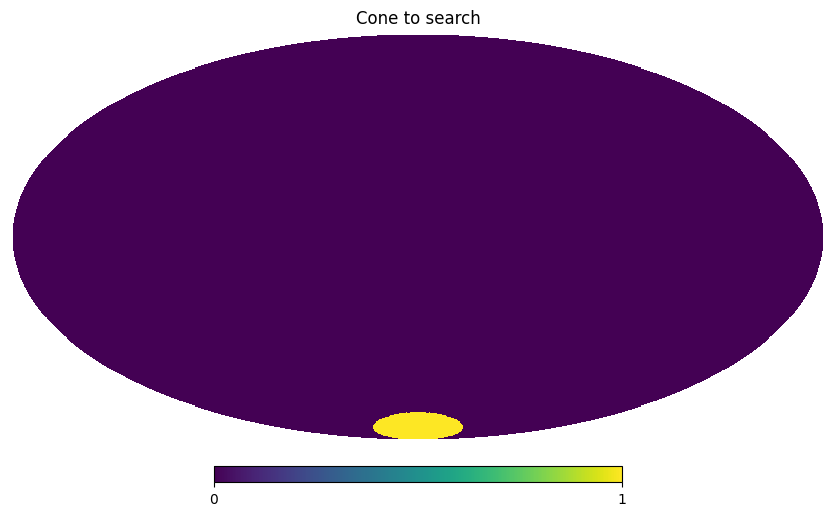

In [29]:
## Plot the cone using healpy for demonstration

NSIDE = 256
NPIX = hp.nside2npix(NSIDE)
m = np.zeros(NPIX)
center_vec = hp.ang2vec(ra, dec, lonlat=True)
radius_radians = np.radians(radius)
cone_pixels = hp.query_disc(NSIDE, center_vec, radius_radians)
m[cone_pixels] = 1
hp.mollview(m, title="Cone to search")

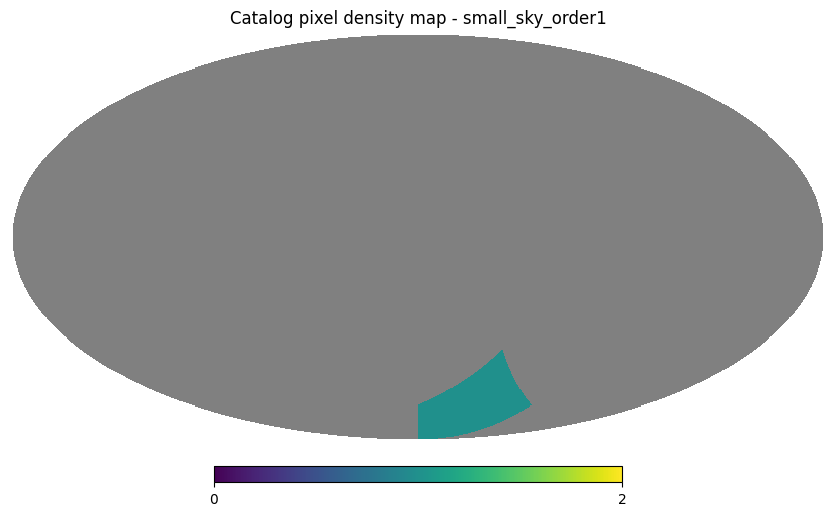

In [35]:
## Filter catalog and plot filtered pixels

filtered_catalog = catalog.filter_by_cone(ra, dec, radius)

inspection.plot_pixels(filtered_catalog)